In [50]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Reading in data and printing dtypes
ipo_data = pd.read_excel("Competation #1 Raw Data_New.xlsx",header=0,na_values='-' )
print(ipo_data.dtypes)

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object


In [52]:
print(ipo_data.head(12))#printing head

      I1                                     I2    I3  P(IPO)  P(H)  P(L)  \
0   AATI     ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1   ABPI        ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2   ACAD             ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3   ACHN          ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4   ACLI        AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   
5   ACOM                     Ancestry.com Inc.   7379    13.5  14.5  12.5   
6   ACOR                ACORDA THERAPEUTICS INC  2836     6.0  13.0  11.0   
7   ACRX             ACELRX PHARMACEUTICALS INC  2834     5.0  14.0  12.0   
8   ACTV                     ACTIVE NETWORK INC  7372    15.0  18.0  16.0   
9    ACW                          ACCURIDE CORP  3714     9.0  19.0  17.0   
10  ADKU             ADCARE HEALTH SYSTEMS, INC   NaN     NaN   NaN   NaN   
11  ADLS  Advanced Life Sciences Holdings, Inc.  2854     5.0   9.0   8.0   

In [53]:
# Some values dont make sesne (like negatives) and P(H) having a zero min - maybe look into when p(h) < p(L)
#converting 1 and 0 to true and false
ipo_data.C2 = ipo_data.C2.astype(bool)
# printing summary stats
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [55]:
# Replacing NaN values with their corresponding mean value
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        ipo_data.iloc[:,i]=ipo_data.iloc[:,i].fillna(ipo_data.iloc[:,i].median())
        print('%s' % ipo_data.columns[i])

# Removing 0 and negatives for T' calculations        
ipo_data['T2']=ipo_data['T2'].mask(ipo_data['T2'] <= 0,ipo_data['T2'].mean())
ipo_data['T1']=ipo_data['T1'].mask(ipo_data['T1'] <= 0,ipo_data['T1'].mean())
ipo_data.describe()

P(IPO)
P(H)
P(L)
P(1Day)
C1
C3
C4
C5
C6
C7
T1
T2
T3
T4
T5
S1
S2
S3


,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000
mean,13.835191,15.474135,13.507493,25.577032,148.350440,1.695003,0.007342,4.916458e+07,1.237106e+07,458.587321,465.602639,12794.972317,11394.948680,294.331378,679.139296,68.409091,120.07478,144.743402
std,6.031536,6.604652,5.792972,72.068973,150.518513,158.309101,0.032777,1.039359e+08,2.502200e+07,1563.531760,175.614521,5401.515677,4836.172083,121.444797,472.571706,39.069141,84.77015,69.226629
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,0.000000,0.000000,-1.000000,-1.000000,20.00000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8168.000000,213.250000,462.250000,45.000000,73.00000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12056.000000,10785.000000,279.000000,624.000000,60.000000,100.00000,134.000000
75%,17.000000,17.000000,15.000000,20.087500,152.750000,0.440000,0.030941,4.936364e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.75000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.00000,883.000000


In [56]:
ipo_data.describe()# checking the variables are their

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000
mean,13.835191,15.474135,13.507493,25.577032,148.350440,1.695003,0.007342,4.916458e+07,1.237106e+07,458.587321,465.602639,12794.972317,11394.948680,294.331378,679.139296,68.409091,120.07478,144.743402
std,6.031536,6.604652,5.792972,72.068973,150.518513,158.309101,0.032777,1.039359e+08,2.502200e+07,1563.531760,175.614521,5401.515677,4836.172083,121.444797,472.571706,39.069141,84.77015,69.226629
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,0.000000,0.000000,-1.000000,-1.000000,20.00000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8168.000000,213.250000,462.250000,45.000000,73.00000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12056.000000,10785.000000,279.000000,624.000000,60.000000,100.00000,134.000000
75%,17.000000,17.000000,15.000000,20.087500,152.750000,0.440000,0.030941,4.936364e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.75000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.00000,883.000000


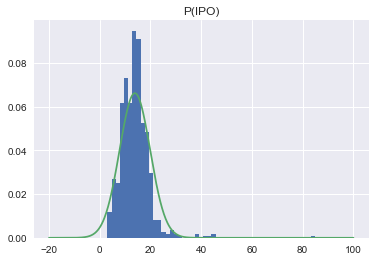

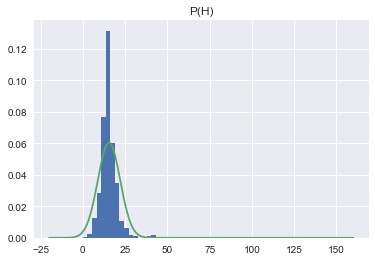

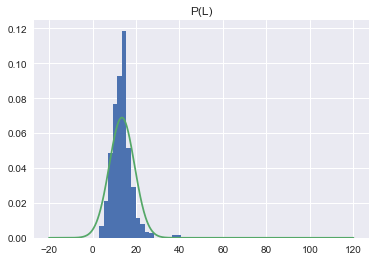

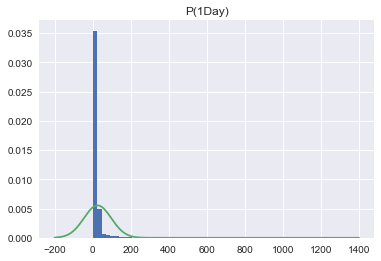

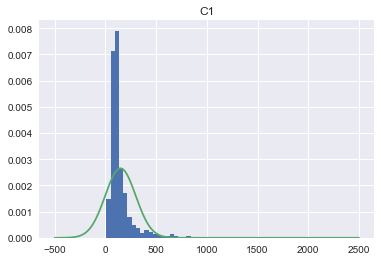

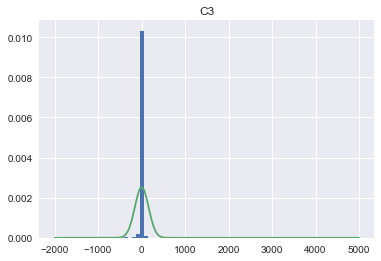

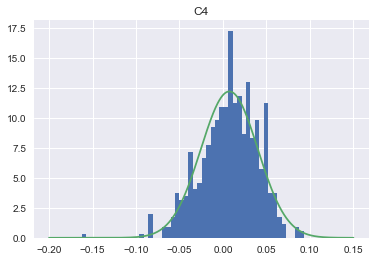

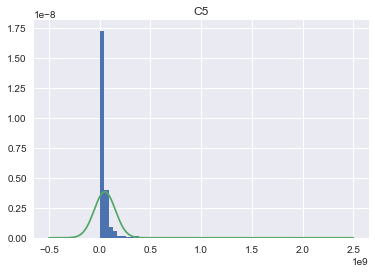

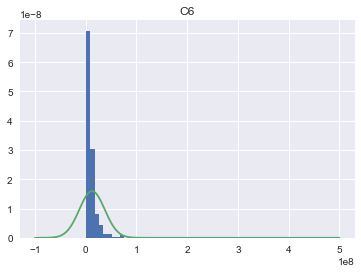

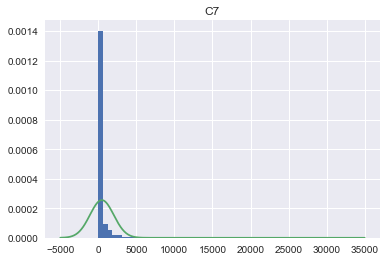

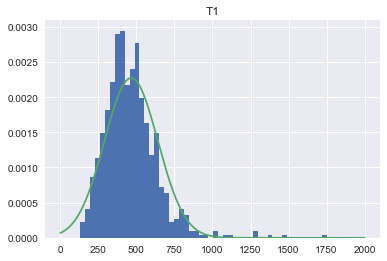

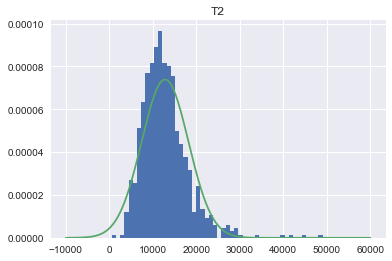

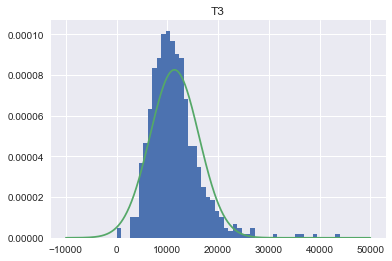

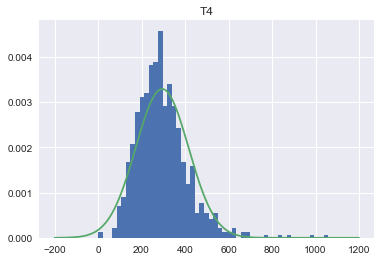

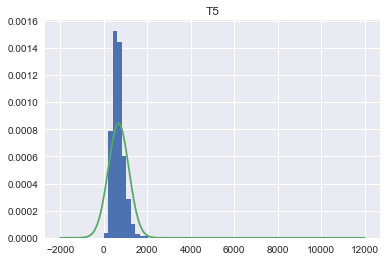

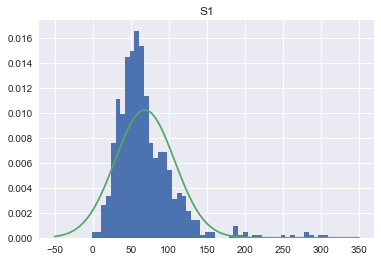

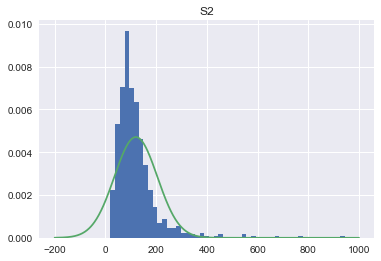

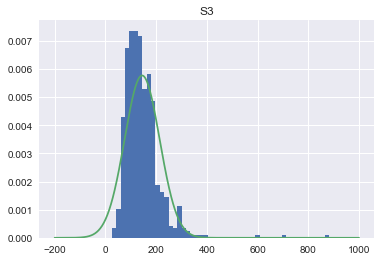

In [57]:
#inf are caused by T2=0 for row 125 and row 199

#Plotting all the float variables along with the normal distribution. Remember, we need a proper bell curve, no long tails at 
# either end
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        plt.hist(ipo_data.iloc[:,i],bins=50,normed=True)
        xt = plt.xticks()[0]  
        xmin, xmax = min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(ipo_data.iloc[:,i]))
        plt.title('%s' % ipo_data.columns[i])
        # lets try the normal distribution first
        m, s = stats.norm.fit(ipo_data.iloc[:,i]) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        plt.plot(lnspc, pdf_g, label="Norm")
        plt.show()

In [58]:
# Conducting shapiro wilk test of normality
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        # Conduct shapiro wilk normality test and print result with col
        print('Col {} :Shapiro {}'.format(ipo_data.columns[i] ,stats.shapiro(ipo_data.iloc[:,i])[1]))
        

Col P(IPO) :Shapiro 1.4921864467869255e-27
Col P(H) :Shapiro 1.2683702830640706e-37
Col P(L) :Shapiro 4.42969319278662e-35
Col P(1Day) :Shapiro 0.0
Col C1 :Shapiro 4.769476268757519e-39
Col C3 :Shapiro 0.0
Col C4 :Shapiro 1.4011792472956586e-06
Col C5 :Shapiro 1.401298464324817e-45
Col C6 :Shapiro 1.401298464324817e-45
Col C7 :Shapiro 1.401298464324817e-45
Col T1 :Shapiro 1.4215008353844283e-20
Col T2 :Shapiro 1.5722826132383473e-20
Col T3 :Shapiro 8.527985253707657e-20
Col T4 :Shapiro 4.719572869920824e-18
Col T5 :Shapiro 6.125495977103073e-41
Col S1 :Shapiro 2.277321717567718e-26
Col S2 :Shapiro 1.0006463252299895e-32
Col S3 :Shapiro 1.3458197432440059e-28


In [59]:
# Conducting normal test of normality
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        # Conduct shapiro wilk normality test and print result with col
        print('Col {} :Normal {}'.format(ipo_data.columns[i] ,stats.normaltest(ipo_data.iloc[:,i])[1]))
        

Col P(IPO) :Normal 1.3965926189441359e-125
Col P(H) :Normal 2.492791374701235e-238
Col P(L) :Normal 1.446068339418692e-206
Col P(1Day) :Normal 9.035873819672048e-274
Col C1 :Normal 4.785373224515028e-176
Col C3 :Normal 0.0
Col C4 :Normal 3.0977232880203923e-08
Col C5 :Normal 1.5033266125180035e-287
Col C6 :Normal 2.8297513754629692e-275
Col C7 :Normal 9.099430017602595e-274
Col T1 :Normal 5.173625779217147e-63
Col T2 :Normal 8.276262837731138e-60
Col T3 :Normal 4.9621893405021424e-57
Col T4 :Normal 3.6471298060622483e-48
Col T5 :Normal 1.6086011264996692e-279
Col S1 :Normal 1.1921476723660342e-80
Col S2 :Normal 7.85100793412786e-128
Col S3 :Normal 6.223017491788845e-124


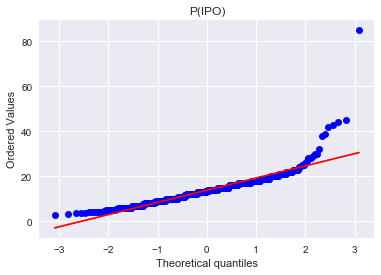

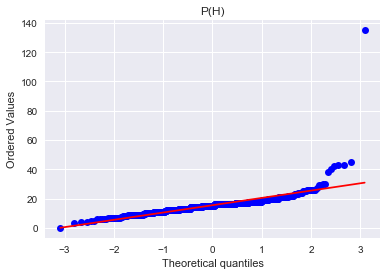

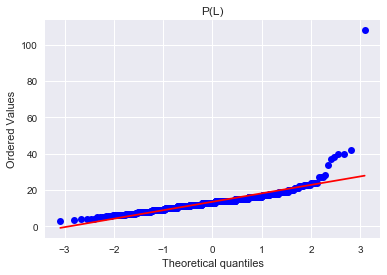

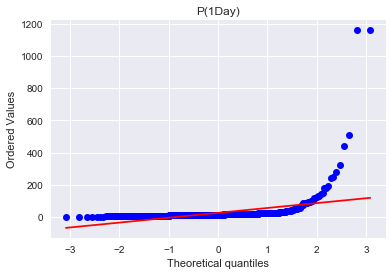

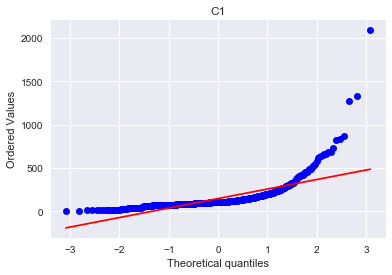

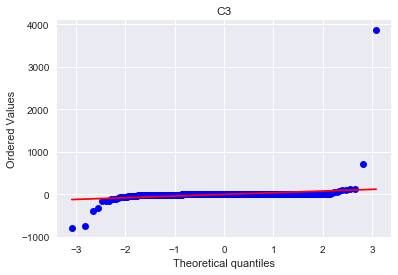

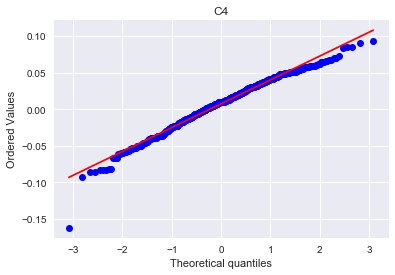

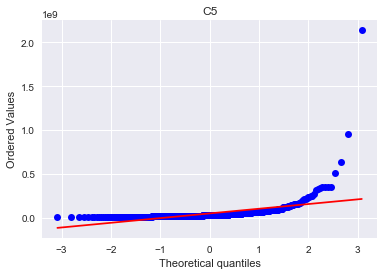

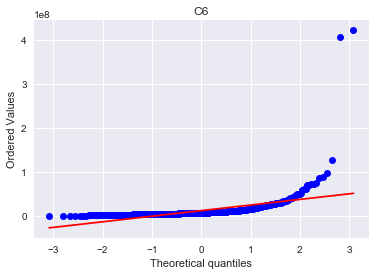

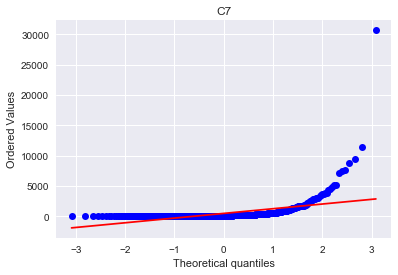

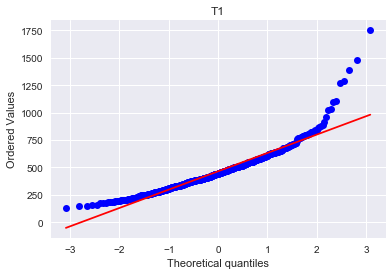

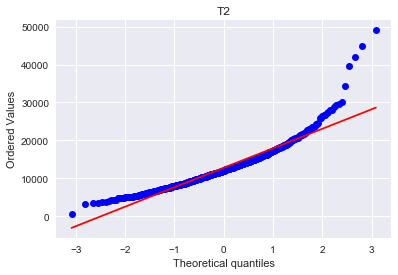

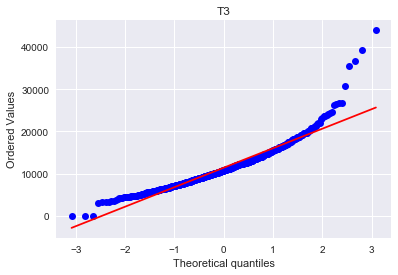

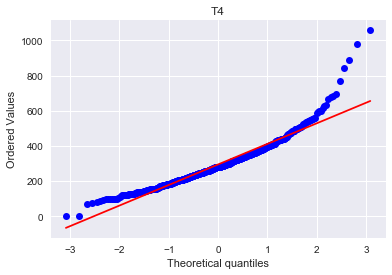

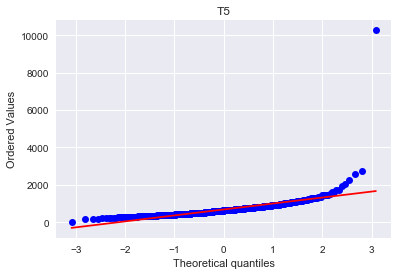

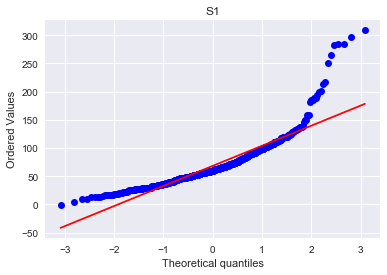

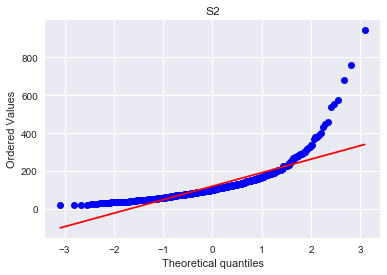

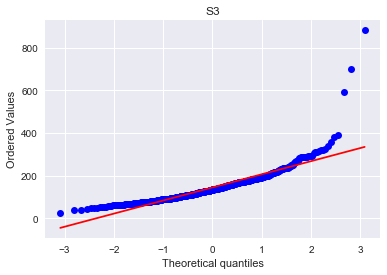

In [60]:
# plotting qq plots
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        stats.probplot(ipo_data.iloc[:,i], dist="norm", plot=pylab)
        pylab.title('%s' % ipo_data.columns[i])
        pylab.show()

In [61]:
# Dealing with outliers using mean
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        mean, std = ipo_data.iloc[:,i].mean(),ipo_data.iloc[:,i].std()

        outliers = (ipo_data.iloc[:,i] - mean).abs() > 3*std

        ipo_data.iloc[:,i][outliers] = mean
#(ipo_data.iloc[:,i].quantile(0.75)- ipo_data.iloc[:,i].quantile(0.25))*1.5
# median = ipo_data.loc[ipo_data["P(IPO)"]>ipo_data['P(IPO)'].mean()+3*ipo_data['P(IPO)'].std(), 'P(IPO)'].mean()
# ipo_data["P(IPO)"] = np.where(ipo_data['P(IPO)']>np.mean(ipo_data['P(IPO)'])+(3*np.std(ipo_data['P(IPO)'])), median,ipo_data["P(IPO)"])
ipo_data.describe()

C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.457891,15.066978,13.149065,19.802455,132.29803,-2.776928,0.007737,4.322594e+07,1.079289e+07,341.924877,454.990357,12507.146479,11116.461200,287.565957,656.959761,64.863236,112.183244,141.170763
std,4.620820,4.038548,3.841511,22.238786,85.76767,26.305823,0.031892,4.822009e+07,1.061774e+07,688.581729,146.651813,4628.390743,4112.340293,104.808904,269.145729,29.356159,57.757007,54.705354
min,3.000000,0.000000,3.000000,0.000000,10.00000,-398.100000,-0.085455,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.00000,-0.740000,-0.013219,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8168.000000,213.250000,462.250000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.00000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12056.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,16.500000,17.000000,15.000000,20.087500,148.35044,0.447500,0.030941,4.916458e+07,1.193426e+07,289.758000,547.000000,15042.500000,13476.250000,350.000000,789.500000,81.000000,137.750000,172.000000
max,30.000000,30.000000,28.000000,239.999940,578.00000,121.000000,0.092896,3.505893e+08,8.525000e+07,5126.000000,961.000000,28756.000000,24619.000000,630.000000,2024.000000,185.000000,371.000000,340.000000


In [65]:
# Calling created package to calculate the missing variables noted in Data dictionary

from new_var import calc
calc(ipo_data)

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y1'][i]=0
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y1'][i]=1


0      0
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     1
24     0
25     1
26     1
27     0
28     1
29     1
      ..
652    1
653    0
654    1
655    0
656    0
657    0
658    1
659    0
660    1
661    1
662    0
663    0
664    0
665    1
666    0
667    1
668    1
669    0
670    1
671    1
672    0
673    0
674    0
675    1
676    1
677    0
678    1
679    0
680    0
681    0
Name: Y1, Length: 682, dtype: int32


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y2'][i]=1
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y2'][i]=0


0      1
1      0
2      0
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
652    0
653    1
654    0
655    1
656    0
657    1
658    0
659    0
660    0
661    0
662    1
663    1
664    1
665    0
666    0
667    1
668    1
669    1
670    1
671    1
672    0
673    1
674    1
675    1
676    1
677    1
678    1
679    0
680    0
681    0
Name: Y2, Length: 682, dtype: int32


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C3x'][i]=1
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C3x'][i]=0


0      1
1      0
2      0
3      0
4      1
5      1
6      0
7      0
8      0
9      1
10     1
11     0
12     1
13     0
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     1
27     0
28     1
29     0
      ..
652    1
653    1
654    0
655    1
656    1
657    0
658    1
659    1
660    0
661    0
662    1
663    0
664    0
665    1
666    1
667    0
668    0
669    0
670    0
671    0
672    1
673    0
674    0
675    1
676    1
677    0
678    0
679    1
680    1
681    1
Name: C3x, Length: 682, dtype: int32


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C6x'][i]=((x['P(IPO)'][i]-mid[i])/(mid[i]*100))
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C6x'][i]=0


0       0.00111111
1                0
2                0
3                0
4           0.0005
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12     0.000666667
13     0.000869565
14               0
15               0
16               0
17               0
18               0
19         0.00125
20               0
21     0.000666667
22               0
23               0
24               0
25               0
26               0
27     0.000526316
28               0
29               0
          ...     
652              0
653     0.00133333
654              0
655         0.0012
656    0.000384615
657              0
658              0
659    0.000333333
660              0
661              0
662       0.000625
663       0.000625
664              0
665              0
666    0.000857143
667              0
668              0
669     0.00133333
670              0
671              0
672     0.00114286
673     0.00

In [67]:
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,Y1,Y2,C3x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
count,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.457891,15.066978,13.149065,19.802455,132.29803,-2.776928,0.007737,4.322594e+07,1.079289e+07,341.924877,...,0.521994,0.708211,0.532258,4.638285,0.914715,0.628398,0.054492,0.005423,0.009015,0.011870
std,4.620820,4.038548,3.841511,22.238786,85.76767,26.305823,0.031892,4.822009e+07,1.061774e+07,688.581729,...,0.499883,0.454919,0.499325,6.276055,0.627474,0.086858,0.048457,0.004785,0.004227,0.008982
min,3.000000,0.000000,3.000000,0.000000,10.00000,-398.100000,-0.085455,3.693227e+06,5.250000e+05,0.074000,...,0.000000,0.000000,0.000000,0.283223,0.000000,0.000000,-0.000089,-0.000093,0.002152,0.005125
25%,10.000000,13.000000,11.000000,11.092500,85.00000,-0.740000,-0.013219,1.874682e+07,5.004180e+06,41.511500,...,0.000000,0.000000,0.000000,2.860940,0.883620,0.579954,0.047413,0.004099,0.006890,0.009581
50%,13.500000,15.000000,13.000000,14.845000,107.00000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,...,1.000000,1.000000,1.000000,3.735660,0.896719,0.629466,0.051901,0.005004,0.008538,0.011313
75%,16.500000,17.000000,15.000000,20.087500,148.35044,0.447500,0.030941,4.916458e+07,1.193426e+07,289.758000,...,1.000000,1.000000,1.000000,4.859228,0.909672,0.674698,0.056514,0.006164,0.010367,0.012855
max,30.000000,30.000000,28.000000,239.999940,578.00000,121.000000,0.092896,3.505893e+08,8.525000e+07,5126.000000,...,1.000000,1.000000,1.000000,99.787255,17.165085,1.443089,1.288689,0.121442,0.091082,0.233397


In [70]:
i=19
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        mean, std = ipo_data.iloc[:,i].mean(),ipo_data.iloc[:,i].std()

        outliers = (ipo_data.iloc[:,i] - mean).abs() > 3*std

        ipo_data.iloc[:,i][outliers] = mean
ipo_data.describe()

C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,Y1,Y2,C3x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.302568,15.004432,13.066362,15.714893,117.335021,-0.555575,0.007737,3.449121e+07,9.013656e+06,194.923165,...,0.521994,0.708211,0.532258,3.928190,0.893855,0.629385,0.052040,0.005172,0.008719,0.011348
std,4.355296,3.784792,3.685288,6.990118,52.221653,3.439497,0.031892,2.284631e+07,5.739032e+06,242.619762,...,0.499883,0.454919,0.499325,1.565303,0.023459,0.068202,0.006781,0.001559,0.002454,0.002439
min,3.000000,4.000000,3.000000,0.000000,10.000000,-24.750000,-0.085455,3.693227e+06,5.250000e+05,0.074000,...,0.000000,0.000000,0.000000,0.283223,0.774154,0.439914,0.031595,0.001389,0.002152,0.005125
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.805000,-0.013219,1.874682e+07,5.004180e+06,41.511500,...,0.000000,0.000000,0.000000,2.860940,0.883901,0.582610,0.047445,0.004109,0.006890,0.009581
50%,13.457891,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,...,1.000000,1.000000,1.000000,3.735660,0.896674,0.629167,0.051909,0.005008,0.008538,0.011313
75%,16.000000,17.000000,15.000000,19.437500,138.750000,0.400000,0.030941,4.322594e+07,1.079289e+07,245.094479,...,1.000000,1.000000,1.000000,4.688785,0.909612,0.673231,0.056253,0.006062,0.010112,0.012804
max,26.000000,26.000000,24.000000,48.000011,307.000000,21.612000,0.092896,1.250255e+08,3.030000e+07,1351.788000,...,1.000000,1.000000,1.000000,9.821142,0.962052,0.826347,0.073417,0.010293,0.016504,0.019996


In [71]:
# Conducting shapiro wilk test of normality
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        # Conduct shapiro wilk normality test and print result with col
        print('Col {} :Shapiro {}'.format(ipo_data.columns[i] ,stats.shapiro(ipo_data.iloc[:,i])[1]))

Col P(IPO) :Shapiro 0.0049266633577644825
Col P(H) :Shapiro 1.946322527146549e-06
Col P(L) :Shapiro 3.260257017245749e-06
Col P(1Day) :Shapiro 4.319526676719188e-15
Col C1 :Shapiro 1.1845181704006278e-17
Col C3 :Shapiro 7.198442857890562e-37
Col C4 :Shapiro 0.0002703821810428053
Col C5 :Shapiro 1.8907444997607988e-23
Col C6 :Shapiro 5.812033792019286e-25
Col C7 :Shapiro 5.105428811136849e-32
Col T1 :Shapiro 1.4031462342245504e-05
Col T2 :Shapiro 4.308528787078103e-06
Col T3 :Shapiro 2.4228538677562028e-05
Col T4 :Shapiro 2.0575565940816887e-05
Col T5 :Shapiro 2.2504988983484964e-09
Col S1 :Shapiro 1.6564627447479552e-09
Col S2 :Shapiro 7.083296189175359e-12
Col S3 :Shapiro 2.5057769748038083e-10
Col C5x :Shapiro 7.893436338585191e-14
Col T3x :Shapiro 2.4388147429424975e-15
Col T4x :Shapiro 0.3381384313106537
Col T5x :Shapiro 0.13858447968959808
Col S1x :Shapiro 1.6022273285898336e-08
Col S2x :Shapiro 4.700002165236583e-08
Col S3x :Shapiro 1.9677859199873637e-06


In [72]:
# Conducting normal test of normality
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        # Conduct shapiro wilk normality test and print result with col
        print('Col {} :Normal {}'.format(ipo_data.columns[i] ,stats.normaltest(ipo_data.iloc[:,i])[1]))
        

Col P(IPO) :Normal 0.11809895344959705
Col P(H) :Normal 0.04935503786207857
Col P(L) :Normal 0.017569429459275157
Col P(1Day) :Normal 4.486418823621432e-29
Col C1 :Normal 1.0212111402581929e-25
Col C3 :Normal 3.382745047992387e-89
Col C4 :Normal 0.004624287691805324
Col C5 :Normal 2.2041379328139203e-39
Col C6 :Normal 4.380439681596091e-46
Col C7 :Normal 4.072973507659508e-74
Col T1 :Normal 0.00026884409821818366
Col T2 :Normal 0.0001076384615972993
Col T3 :Normal 0.0008027533786743281
Col T4 :Normal 0.0002622225506344716
Col T5 :Normal 4.563436388672945e-08
Col S1 :Normal 2.24031162290129e-07
Col S2 :Normal 1.8912425006137535e-11
Col S3 :Normal 1.223301944836768e-09
Col C5x :Normal 1.1592494281927282e-20
Col T3x :Normal 1.5605512477411956e-27
Col T4x :Normal 0.47071322437069785
Col T5x :Normal 0.15428356476922414
Col S1x :Normal 1.360184703796462e-08
Col S2x :Normal 2.2538044090104152e-07
Col S3x :Normal 3.5059094538122095e-07


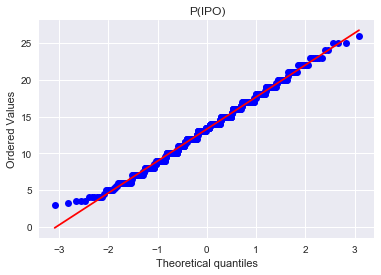

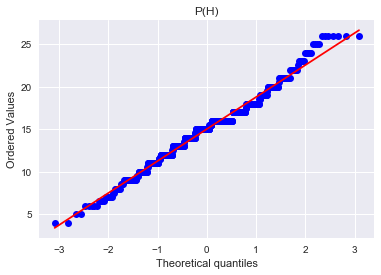

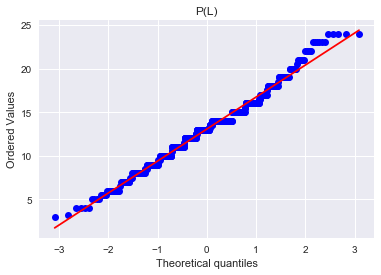

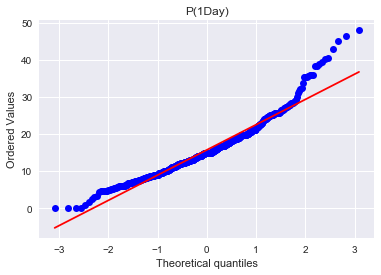

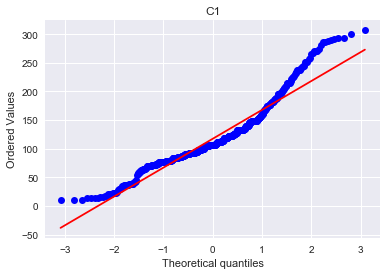

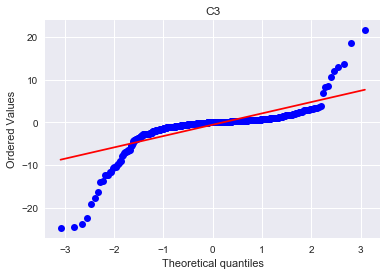

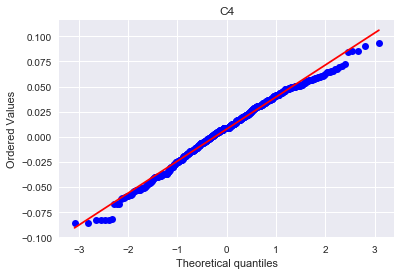

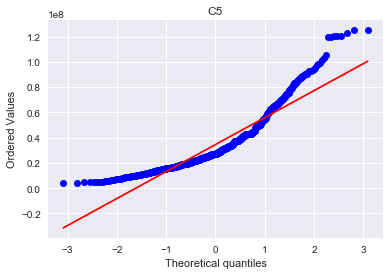

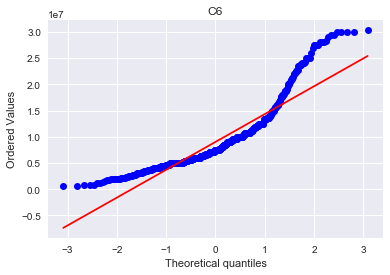

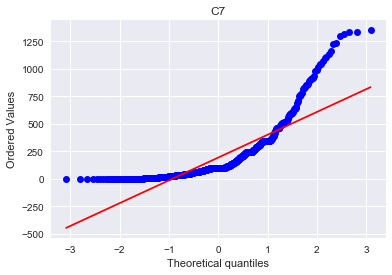

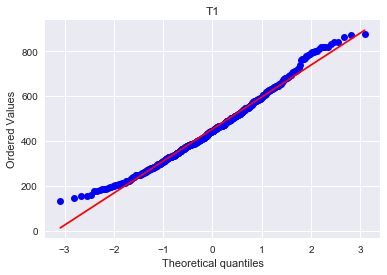

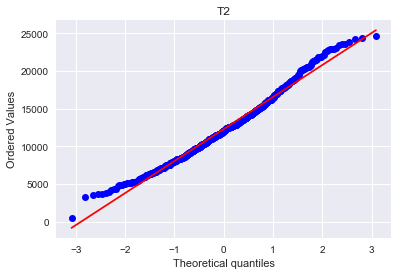

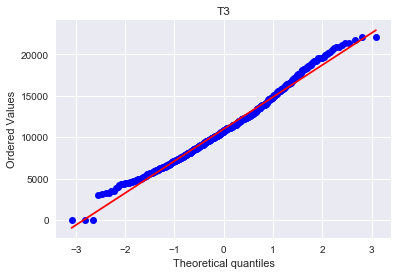

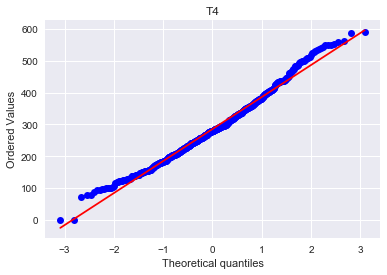

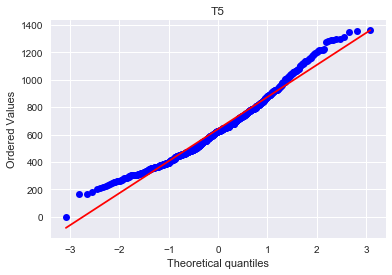

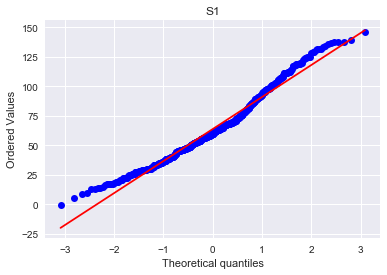

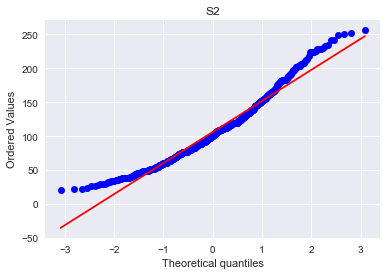

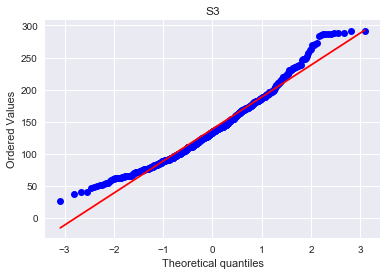

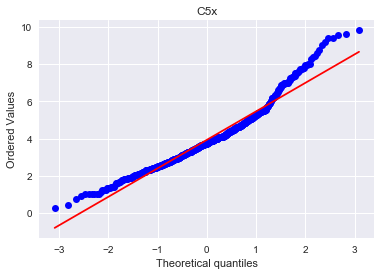

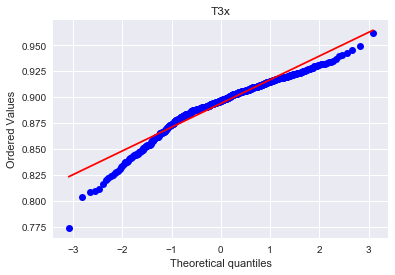

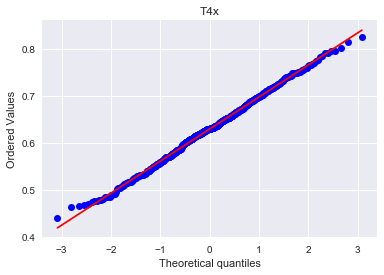

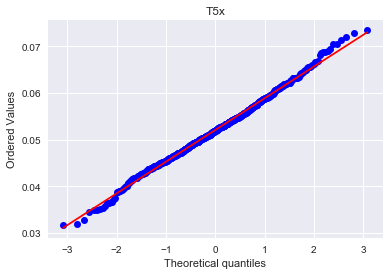

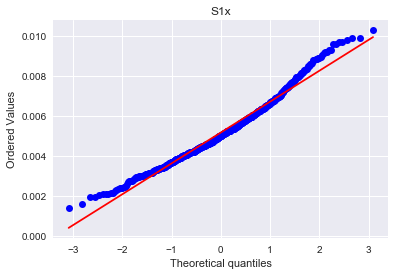

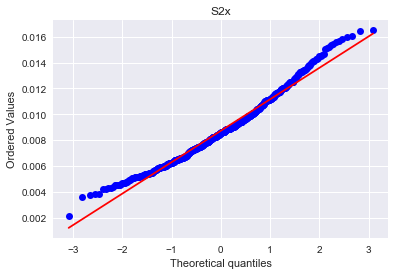

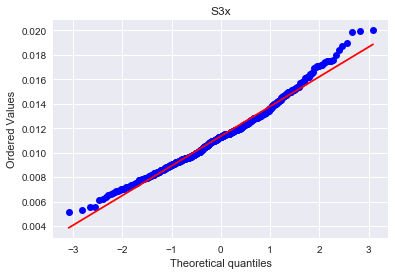

In [73]:
# plotting qq plots
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        stats.probplot(ipo_data.iloc[:,i], dist="norm", plot=pylab)
        pylab.title('%s' % ipo_data.columns[i])
        pylab.show()

In [48]:
# # Conducting shapiro wilk test of normality on log transform
# for i in range(len(ipo_data.columns)):
#     if ipo_data.iloc[:,i].dtype == float:
#         # Conduct shapiro wilk normality test and print result with col
        
#         log_data=np.log(ipo_data.iloc[:,i])
#         print('Col {} :Shapiro {}'.format(ipo_data.columns[i] ,stats.shapiro(log_data)[1]))

In [82]:
# Conducting normal test of normality on log transform
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        # if statement to remove 'goodd' ones
        if stats.shapiro(ipo_data.iloc[:,i])[1]<0.0001:
        # Conduct shapiro wilk normality test and print result with col
            log_data=np.log(ipo_data.iloc[:,i])
            print('Col {} :Normal {}'.format(ipo_data.columns[i] ,stats.shapiro(log_data)[1]))
        

Col P(H) :Normal 1.2398624759936113e-15
Col P(L) :Normal 1.0876756851956049e-14
Col P(1Day) :Normal 1.0
Col C1 :Normal 1.4039132307274463e-20
Col C3 :Normal 1.0
Col C5 :Normal 0.008638902567327023
Col C6 :Normal 6.042963018870751e-09
Col C7 :Normal 1.00884899136225e-19
Col T1 :Normal 5.6465592024324e-07
Col T2 :Normal 1.0928355558003939e-14
Col T3 :Normal 1.0
Col T4 :Normal 1.0
Col T5 :Normal 1.0
Col S1 :Normal 1.0
Col S2 :Normal 1.9190629245713353e-06
Col S3 :Normal 0.00012351882469374686
Col C5x :Normal 4.023081780907267e-12
Col T3x :Normal 8.450067518002394e-17
Col S1x :Normal 0.0001311702508246526
Col S2x :Normal 0.002270040102303028
Col S3x :Normal 0.027109336107969284


C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


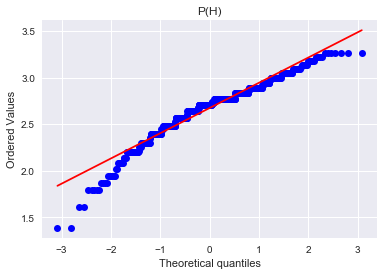

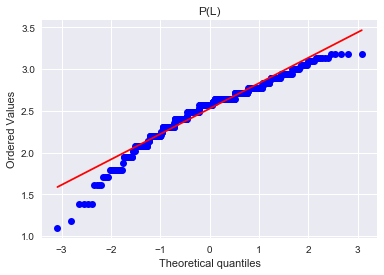

C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\conor\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3082: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


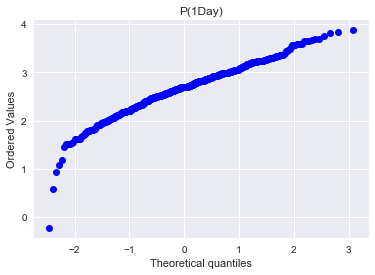

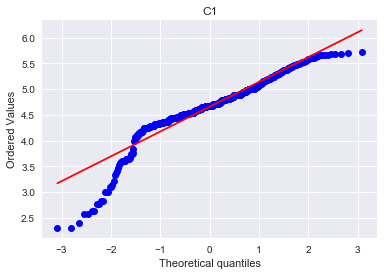

C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


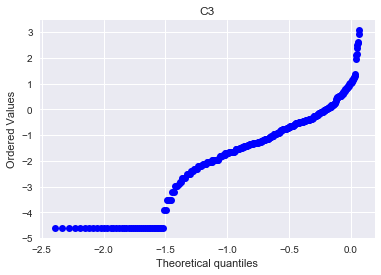

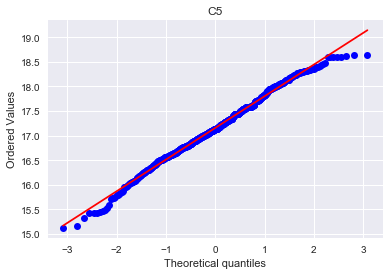

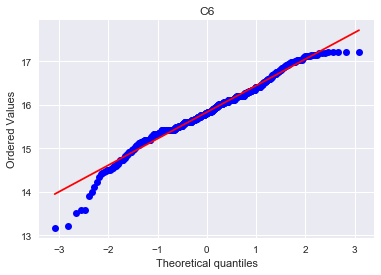

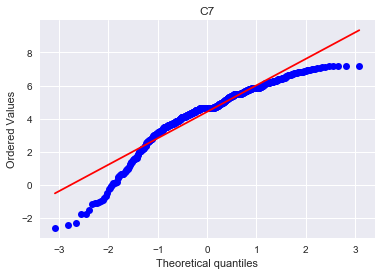

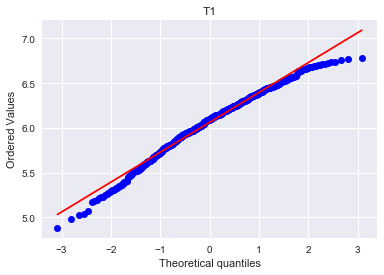

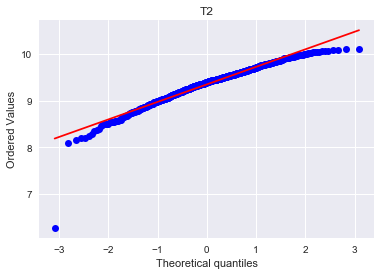

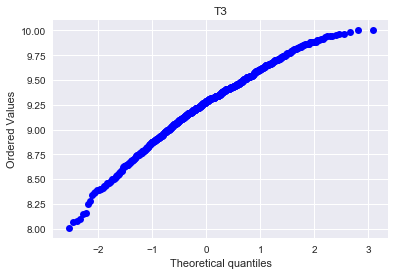

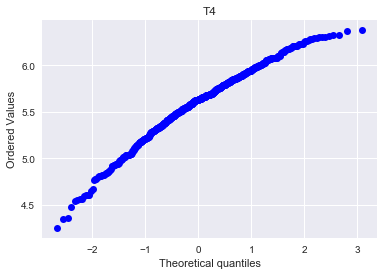

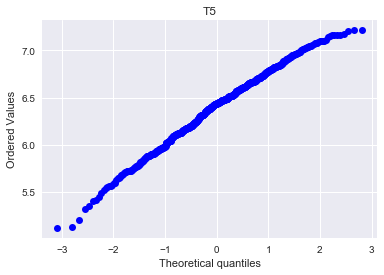

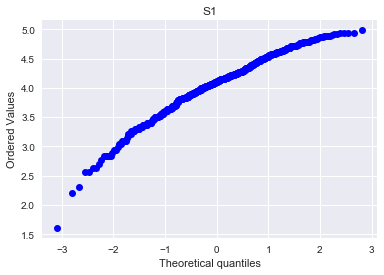

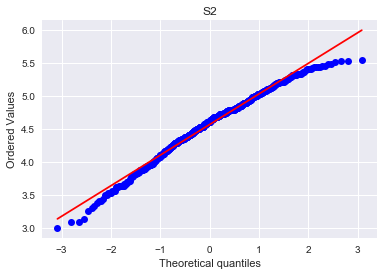

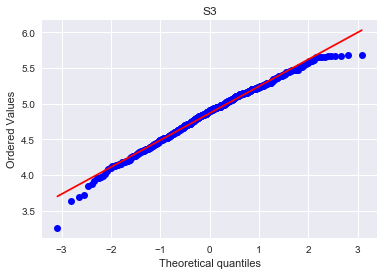

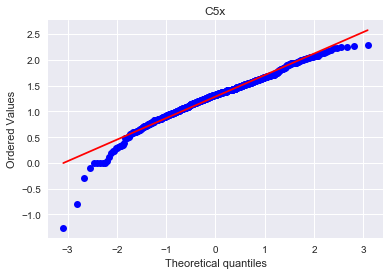

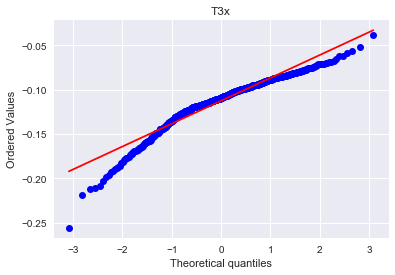

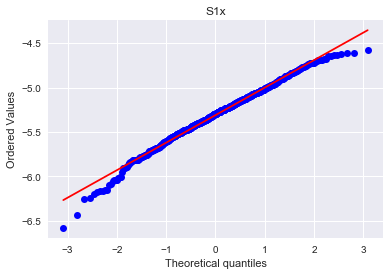

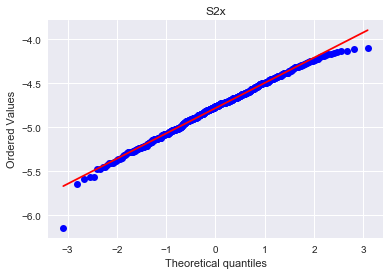

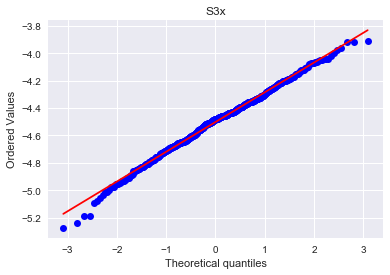

In [83]:
# plotting qq plots
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        if stats.shapiro(ipo_data.iloc[:,i])[1]<0.0001:
            stats.probplot(np.log(ipo_data.iloc[:,i]), dist="norm", plot=pylab)
            pylab.title('%s' % ipo_data.columns[i])
            pylab.show()

In [88]:
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        if stats.shapiro(ipo_data.iloc[:,i])[1]<0.0001 or stats.shapiro(np.log(ipo_data.iloc[:,i]))[1]<0.0001:
        # Conduct shapiro wilk normality test and print result with col
            sqrt_data=np.sqrt(ipo_data.iloc[:,i])
            print('Col {} :Normal {}'.format(ipo_data.columns[i] ,stats.shapiro(sqrt_data)[1]))

Col P(IPO) :Normal 2.0578586372721475e-06
Col P(H) :Normal 7.458675455040975e-09
Col P(L) :Normal 2.8544744168357283e-07
Col P(1Day) :Normal 4.242739493065528e-09
Col C1 :Normal 2.9505755477776674e-11
Col C3 :Normal 1.0
Col C5 :Normal 2.6261382391618016e-12
Col C6 :Normal 7.778243923516753e-14
Col C7 :Normal 1.7241331818559642e-16
Col T1 :Normal 0.3112453520298004
Col T2 :Normal 0.05207196995615959
Col T3 :Normal 3.28308241703823e-10
Col T4 :Normal 1.9829560926609702e-07
Col T5 :Normal 1.0
Col S1 :Normal 1.0
Col S2 :Normal 0.015204857103526592
Col S3 :Normal 0.024888833984732628
Col C5x :Normal 0.00024298303469549865
Col T3x :Normal 4.510947546590069e-16
Col S1x :Normal 0.12240626662969589
Col S2x :Normal 0.07620622217655182
Col S3x :Normal 0.12906765937805176


C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
